In [8]:
%matplotlib inline
import requests, time, jieba, re
import numpy as np
from PIL import Image
from bs4 import BeautifulSoup
from wordcloud import ImageColorGenerator, WordCloud
import matplotlib.pyplot as plt

In [9]:
ptt_url = 'https://www.ptt.cc'
# setting url and headers
url = "https://www.ptt.cc/bbs/NBA/index.html"
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36'}

re_timeStampFilter = re.compile(r'(\d{2}/\d{2}\s\d{2}:\d{2})')
re_urlFilter = re.compile('(https://[^/]+)')
re_uselessFilter = re.compile(r'--※\s發信站:\s批踢踢實業坊\(ptt.cc\),\s來自:\s\d{1,3}.\d{1,3}.\d{1,3}.\d{1,3}\s\(臺灣\)※\s文章網址:\shttps://.*.html')
re_uselessFilter2 = re.compile(r'(\[..\]|看板|標題|作者|批踢踢實業坊|關於我們聯絡資訊返回|圖.翻攝自..|引用網址)|\w{3}\s\w{3}\s\d{1,2}\s\d{2}:\d{2}:\d{2}')

In [43]:
def get_url(url):
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    return soup


def last_url(soup):
    if 'disabled' in soup.select('a.btn')[3]['class']:
        print('All pages have been catched !!')

    else:
        last_page = ptt_url + soup.select('a.btn')[3]['href']
        return last_page
    

def list_url(soup):
    try:
        url_list = [ptt_url + url['href'] for url in soup.select('div.title a')]
    except Exception as e:
        print(e)
    return url_list
        
def search_bar():
    q = input('Please key-in the name of NBA Player')
    search_url = 'https://www.ptt.cc/bbs/NBA/search?q='
    return search_url + q


def get_content(url):
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    return soup.text


def modified_string(str):
    raw_content = str.replace('\n', '').split('(function(i,s,o,g,r,a,m)')[0]
    raw_content = re.sub(re_timeStampFilter, '', raw_content)
    raw_content = re.sub(re_uselessFilter, '', raw_content)
    raw_content = re.sub(re_urlFilter, '', raw_content)
    raw_content = re.sub(re_uselessFilter2, '', raw_content)
    raw_content = re.sub(r'\W', '', raw_content)
    return raw_content
  
    
def transparent_back(img):
    img = img.convert('RGBA')
    height, weight = img.size
    color_0 = img.getpixel((300,420))
    for h in range(height):
        for w in range(weight):
            dot = (h, w)
            color_1 = img.getpixel(dot)
            if color_1 == color_0:
                color_1 = color_1[:-1] + (0,)
                img.putpixel(dot,color_1)
    return img

In [39]:
icon_path = './Image/310-3108093_nba-mvp-illustration-lebron-james-illustrations-hd-.png'
icon = Image.open(icon_path)
# icon = icon.resize((1000,1000))
icon = transparent_back(icon)
mask = Image.new('RGB', icon.size, (255,255,255))
mask.paste(icon, icon)
mask = np.array(mask)

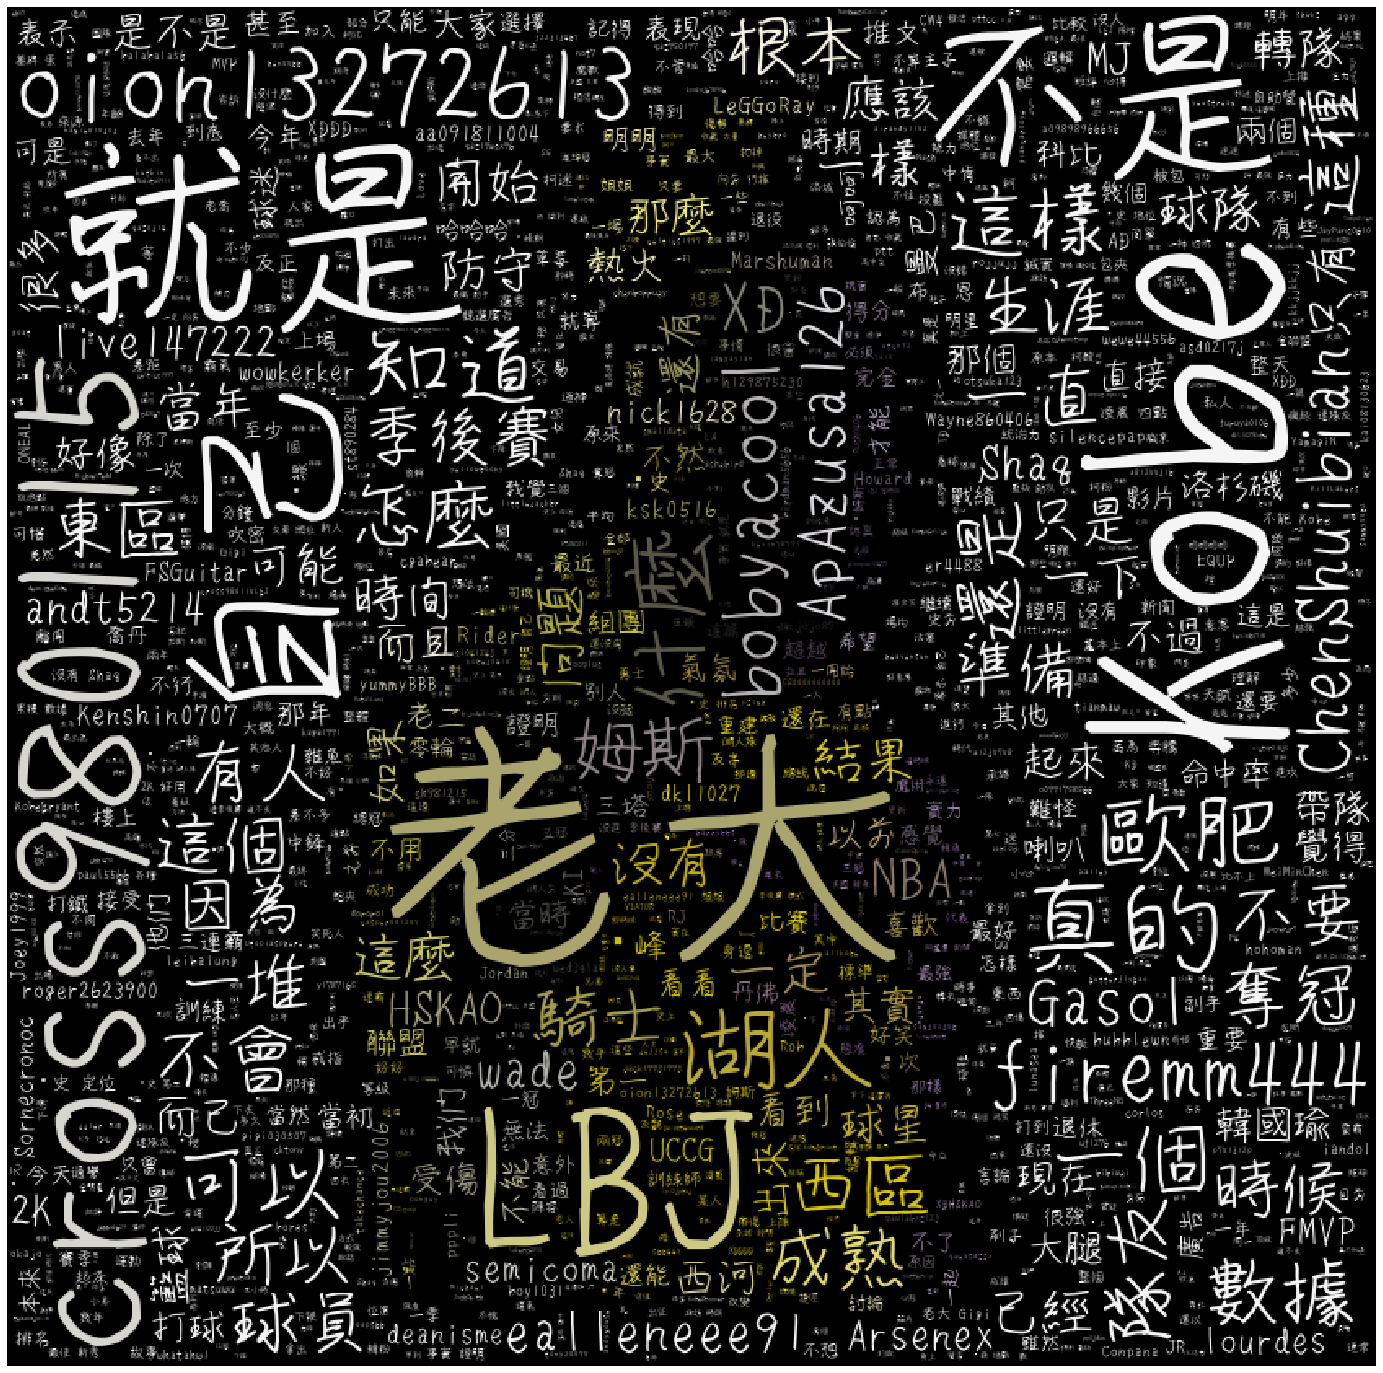

In [40]:
color_func = ImageColorGenerator(mask)

# indicate the font path that can display Chinese
font_path = 'SNsanafonGyou.ttf'

wc = WordCloud(font_path=font_path, background_color="black", max_words=5000, mask=mask, max_font_size=300)
wc.generate_from_text(test_str)
wc.recolor(color_func=color_func, random_state=None) 

# save as png
output_path = './OutImage/wordcloud.png'
wc.to_file(output_path)

# display the word cloud
plt.rcParams["figure.figsize"] = (25,25)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [37]:
l = list_url(get_url('https://www.ptt.cc/bbs/NBA/search?q=KOBE'))
test_str = ''
for i in l:
    test_str += modified_string(get_content(i))

In [38]:
test_str = ' '.join(jieba.cut(test_str))

In [45]:
search_bar()

Please key-in the name of NBA Player kobe


'https://www.ptt.cc/bbs/NBA/search?q=kobe'